In [1]:
import pandas as pd

In [3]:
data=pd.read_csv("svm.csv",header=-1)

In [6]:
X_train,y_train=data.get_values()[:,[1,2]],data.get_values()[:,0]

In [35]:
for i in range(y_train.size): 
    if y_train[i]==0: 
        y_train[i]=-1

In [36]:
print X_train.shape,y_train.shape

(10L, 2L) (10L,)


In [12]:
from sklearn.svm import SVC

In [37]:
clf=SVC(C=100000,kernel='linear',random_state=241)

In [38]:
clf.fit(X_train,y_train)

SVC(C=100000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=241, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
clf.dual_coef_

array([[ -42.60522582, -174.39460845,  216.99983427]])

In [21]:
import numpy as np

In [40]:
w=np.zeros(X_train[1].shape)
for i,k in enumerate(clf.support_):
    w+=clf.dual_coef_[0,i]*y_train[k]*X_train[k]
b=1/y_train[0]+np.dot(w,X_train[0])

In [41]:
print w,b

[ 240.47244552  211.99536302] 228.809367141


In [75]:
from matplotlib.pyplot import plot,scatter,contourf
%matplotlib inline
color={-1:'b',1:'r'}
xx,yy=np.meshgrid(np.linspace(0,1,100),np.linspace(0,1,100))
t=np.array([xx.reshape(1,10000),yy.reshape(1,10000)]).reshape(2,10000)
z=clf.predict(t.T).reshape(100,100)

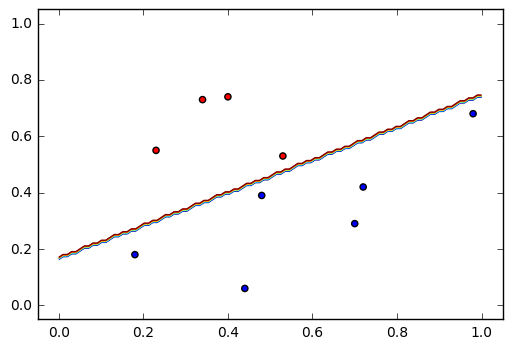

In [76]:
scatter(X_train[:,0],X_train[:,1],c=[color[i] for i in y_train])
contour(xx,yy,z)